In [1]:
import os
os.chdir("C:\\Users\\kaust\\OneDrive\Desktop\\Supply Chain Analytics\\Forecasting Assignment")

In [3]:
import warnings 
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

### Convert retail_clean to monthly time series of total sales

In [4]:
data = pd.read_csv("retail_clean.csv")
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [6]:
data.InvoiceDate

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                 ...         
779490    2011-12-09 12:50:00
779491    2011-12-09 12:50:00
779492    2011-12-09 12:50:00
779493    2011-12-09 12:50:00
779494    2011-12-09 12:50:00
Name: InvoiceDate, Length: 779495, dtype: object

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['date'] = data['InvoiceDate'].dt.strftime("%d-%m-%y")
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   779495 non-null  int64         
 1   Invoice      779495 non-null  int64         
 2   StockCode    779495 non-null  object        
 3   Description  779495 non-null  object        
 4   Quantity     779495 non-null  int64         
 5   InvoiceDate  779495 non-null  datetime64[ns]
 6   Price        779495 non-null  float64       
 7   Customer ID  779495 non-null  float64       
 8   Country      779495 non-null  object        
 9   Revenue      779495 non-null  float64       
 10  date         779495 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(3)
memory usage: 65.4+ MB


In [17]:
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data['week'] = data.date.dt.week

C:\Users\kaust\AppData\Local\Temp\ipykernel_40856\3036010110.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week'] = data.date.dt.week


In [18]:
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,month,year,week
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-01-12,1,2009,3
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-01-12,1,2009,3
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-01-12,1,2009,3
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-01-12,1,2009,3
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-01-12,1,2009,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-09-12,9,2011,37
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-09-12,9,2011,37
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-09-12,9,2011,37
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-09-12,9,2011,37


In [19]:
time_series = data.groupby(['month','week','year']).agg(date = ('date','first'),
                                          total_sales = ('Quantity', np.sum)).reset_index().sort_values('date')

In [22]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 4 to 127
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        133 non-null    int64         
 1   week         133 non-null    int64         
 2   year         133 non-null    int64         
 3   date         133 non-null    datetime64[ns]
 4   total_sales  133 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 6.2 KB


## Plot for trend, Seasonality and Remainder

In [23]:
time_series = time_series.set_index('date')

In [24]:
monthly_series = time_series.total_sales.resample('M').sum()

<AxesSubplot:xlabel='date'>

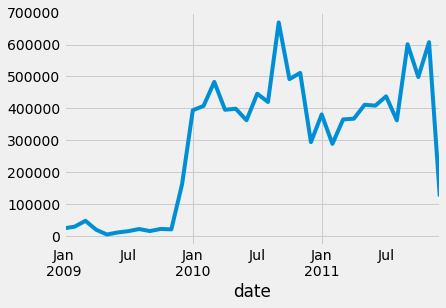

In [25]:
monthly_series.plot()

In [26]:
components = sm.tsa.seasonal_decompose(monthly_series)

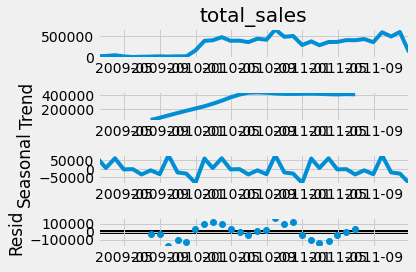

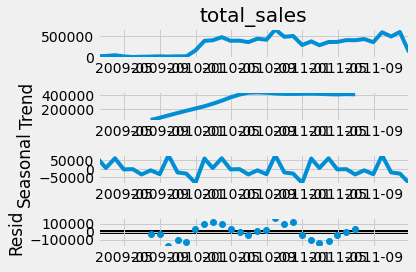

In [29]:
components.plot()

In [31]:
trend = components.trend
seasonality = components.seasonal
remainder = components.resid

<AxesSubplot:xlabel='date'>

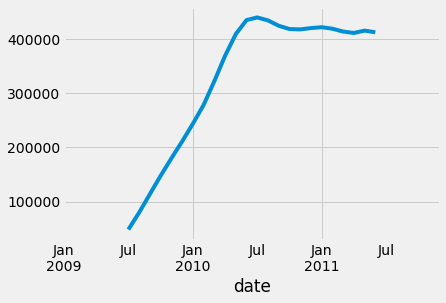

In [32]:
trend.plot()

<AxesSubplot:xlabel='date'>

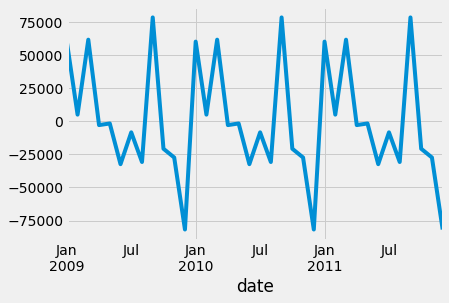

In [33]:
seasonality.plot()

<AxesSubplot:xlabel='date'>

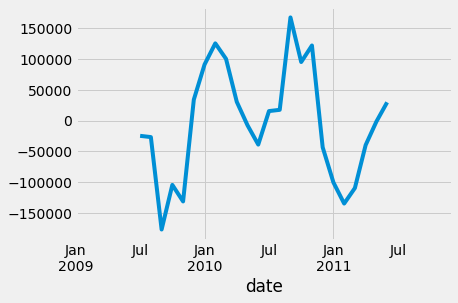

In [34]:
remainder.plot()

In [35]:
ad_fuller_test = sm.tsa.stattools.adfuller(monthly_series, autolag= 'AIC')

In [38]:
ad_fuller_test

(-1.6172736939613381,
 0.4741588821031129,
 3,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 649.5468894459195)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

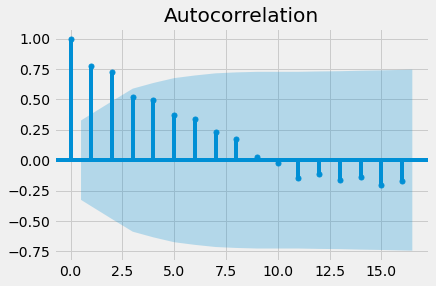

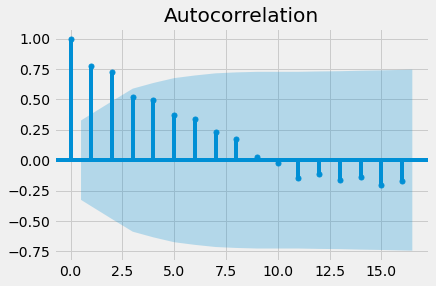

In [40]:
plot_acf(monthly_series)

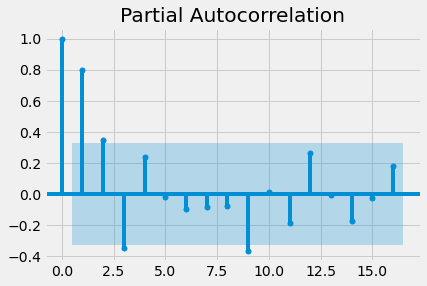

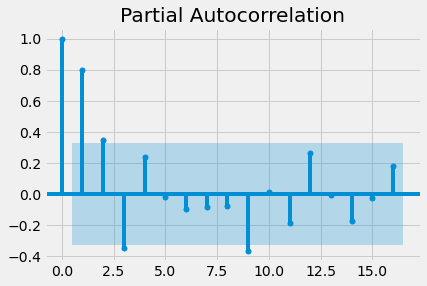

In [41]:
plot_pacf(monthly_series)

## Fit the time series to a moving average model, Find the AIC.

In [42]:
model_ma = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,1))

In [43]:
results = model_ma.fit()

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [44]:
results

In [45]:
results.aic

1007.2704067129008

In [46]:
model_ma_1 = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,2))

In [47]:
results1 = model_ma_1.fit()

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [48]:
results1.aic

998.1303270989391

In [49]:
model_ma_2 = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,3))
results2 = model_ma_2.fit()
results2.aic

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


998.5642530575715

In [50]:
model_ma_3 = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,4))
results3 = model_ma_3.fit()
results3.aic

1000.7559214419796

In [51]:
model_ma_4 = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,5))
results4 = model_ma_4.fit()
results4.aic

1000.8631448279948

## Fit the time series to an AR model, Find the AIC

In [52]:
model_ar = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,0,0))
results = model_ar.fit()
results.aic

953.2549432657275

In [53]:
model_ar_1 = sm.tsa.statespace.SARIMAX(monthly_series, order = (2,0,0))
results1 = model_ar_1.fit()
results1.aic

950.6493579660155

In [54]:
model_ar_2 = sm.tsa.statespace.SARIMAX(monthly_series, order = (3,0,0))
results2 = model_ar_2.fit()
results2.aic

946.0788453611477

In [57]:
model_ar_3 = sm.tsa.statespace.SARIMAX(monthly_series, order = (4,0,0))
results2 = model_ar_2.fit()
results2.aic

946.0788453611477

In [72]:
model_ar_4 = sm.tsa.statespace.SARIMAX(monthly_series, order = (4,0,0))
results3= model_ar_4.fit()
results3.aic

941.3792378517965

## Fit the time series to an ARIMA model, Find the AIC

In [74]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,1,1))
results= model_arima.fit()
results.aic

915.0603564254284

In [78]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (2,1,1))
results= model_arima.fit()
results.aic

915.1770940610058

In [79]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,2,1))
results= model_arima.fit()
results.aic

894.953365096745

In [80]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,1,2))
results= model_arima.fit()
results.aic

915.2652939649107

In [81]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (2,2,2))
results= model_arima.fit()
results.aic

895.5384663256546

## Do a search on the SARIMA components using intercools ,Find the model with the lowest AIC 


In [82]:
import itertools

In [83]:
P=D=Q=p=d=q=range(0,3)
s=12

In [84]:
combinations = list(itertools.product(p,d,q,P,D,Q))

In [85]:
arima_order = [(x[0],x[1],x[2]) for x in combinations]
arima_order[0][0]

0

In [90]:
results_data = pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])

In [87]:
seasonal_order = [(x[3],x[4],x[5],s) for x in combinations]

In [92]:
len(combinations)

for i in range(len(combinations)):
    try:
        model = sm.tsa.statespace.SARIMAX(monthly_series,order = arima_order[i],seasonal_order=seasonal_order[i])
        result = model.fit()
        results_data.loc[i,'p'] = arima_order[i][0]
        results_data.loc[i,'d'] = arima_order[i][1]
        results_data.loc[i,'q'] = arima_order[i][2]
        results_data.loc[i,'P'] = seasonal_order[i][0]
        results_data.loc[i,'D'] = seasonal_order[i][1]
        results_data.loc[i,'Q'] = seasonal_order[i][2]
        results_data.loc[i,'Aic'] = result.aic
    except:
        continue

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
results_data

,p,d,q,P,D,Q,AIC,Aic
0,0,0,0,0,0,0,NaN,1024.805968
1,0,0,0,0,0,1,NaN,1008.280232
2,0,0,0,0,0,2,NaN,1007.594422
3,0,0,0,0,1,0,NaN,678.327271
4,0,0,0,0,1,1,NaN,681.763356
...,...,...,...,...,...,...,...,...
724,2,2,2,2,1,1,NaN,594.401938
725,2,2,2,2,1,2,NaN,596.398113
726,2,2,2,2,2,0,NaN,14.000000
727,2,2,2,2,2,1,NaN,16.000000


In [96]:
results_data[results_data.Aic == min(results_data.Aic)] 

,p,d,q,P,D,Q,AIC,Aic
708,2,2,2,0,2,0,NaN,10.0


### Make a plot with a forecast of 12 month ahead using the best fitted sarima.

In [98]:
best_model = sm.tsa.statespace.SARIMAX(monthly_series, order = (2,2,2),
                                      seasonal_order=(0,2,0,12))

In [100]:
results = best_model.fit()

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
monthly_series
fitting = results.get_prediction(start = '2009-12-31')

In [106]:
fitting_mean = fitting.predicted_mean
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

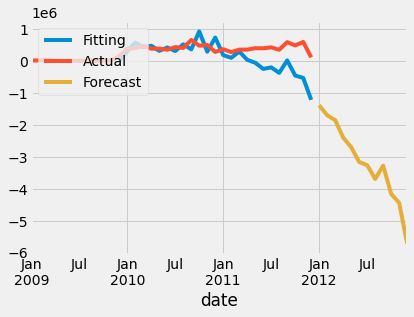

In [107]:
fitting_mean.plot(label = 'Fitting')
monthly_series.plot(label = 'Actual')
forecast_mean.plot(label = 'Forecast')
plt.legend(loc = 'upper left')

## 8-	Make an exponential fitting using the combinations of the multiplicative and additive trend 

In [115]:
mean_absolute_error = abs(monthly_series - fitting_mean).mean()
mean_absolute_error

379751.1608900829

In [116]:
import statsmodels as sm
sm.tsa.holtwinters.ExponentialSmoothing

statsmodels.tsa.holtwinters.model.ExponentialSmoothing

In [117]:
model_expo1 = sm.tsa.holtwinters.ExponentialSmoothing(monthly_series, trend = 'add',
                                                      seasonal = 'add', seasonal_periods=12)
model_expo2 = sm.tsa.holtwinters.ExponentialSmoothing(monthly_series, trend = 'mul',
                                                      seasonal = 'add', seasonal_periods=12)
model_expo3 = sm.tsa.holtwinters.ExponentialSmoothing(monthly_series, trend = 'add',
                                                      seasonal = 'mul', seasonal_periods=12)
model_expo4 = sm.tsa.holtwinters.ExponentialSmoothing(monthly_series, trend = 'mul',
                                                      seasonal = 'mul', seasonal_periods=12)

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [118]:
results_1 = model_expo1.fit()
results_2 = model_expo2.fit()
results_3 = model_expo3.fit()
results_4 = model_expo4.fit()

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [119]:
results_1.summary()

Dep. Variable:,total_sales,No. Observations:,36
Model:,ExponentialSmoothing,SSE,634967455438.406
Optimized:,True,AIC,881.360
Trend:,Additive,BIC,906.696
Seasonal:,Additive,AICC,921.595
Seasonal Periods:,12,Date:,"Sat, 19 Mar 2022"
Box-Cox:,False,Time:,14:31:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5781182,alpha,True
smoothing_trend,0.0370254,beta,True


In [120]:
results_2.summary()

Dep. Variable:,total_sales,No. Observations:,36
Model:,ExponentialSmoothing,SSE,916573408346.698
Optimized:,True,AIC,894.574
Trend:,Multiplicative,BIC,919.910
Seasonal:,Additive,AICC,934.809
Seasonal Periods:,12,Date:,"Sat, 19 Mar 2022"
Box-Cox:,False,Time:,14:31:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7121429,alpha,True
smoothing_trend,0.1483631,beta,True


In [121]:
results_3.summary()

Dep. Variable:,total_sales,No. Observations:,36
Model:,ExponentialSmoothing,SSE,2348273668832.220
Optimized:,True,AIC,928.443
Trend:,Additive,BIC,953.779
Seasonal:,Multiplicative,AICC,968.678
Seasonal Periods:,12,Date:,"Sat, 19 Mar 2022"
Box-Cox:,False,Time:,14:31:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [122]:
results_4.summary()

Dep. Variable:,total_sales,No. Observations:,36
Model:,ExponentialSmoothing,SSE,51805384726532.852
Optimized:,True,AIC,1039.820
Trend:,Multiplicative,BIC,1065.156
Seasonal:,Multiplicative,AICC,1080.055
Seasonal Periods:,12,Date:,"Sat, 19 Mar 2022"
Box-Cox:,False,Time:,14:32:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8535714,alpha,True
smoothing_trend,0.0001,beta,True


In [123]:
fit1 = model_expo1.fit().predict(0,len(monthly_series))
fit2 = model_expo2.fit().predict(0,len(monthly_series))
fit3 = model_expo3.fit().predict(0,len(monthly_series))
fit4 = model_expo4.fit().predict(0,len(monthly_series))

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [124]:
mae1 = abs(monthly_series - fit1).mean()
mae2 = abs(monthly_series - fit2).mean()
mae3 = abs(monthly_series - fit3).mean()
mae4 = abs(monthly_series - fit4).mean()
print('mae1=', mae1)
print('mae2=', mae2)
print('mae3=', mae3)
print('mae4=', mae4)

mae1= 82358.38977092694
mae2= 104101.78478249692
mae3= 187167.68409530574
mae4= 451253.32206748443


## Compared to best fitted model would be exponential model with seasonality and trend being additive 

## Forecast for next 12 months

In [125]:
forecast = model_expo1.fit().predict(0,len(monthly_series)+12)

C:\Users\kaust\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


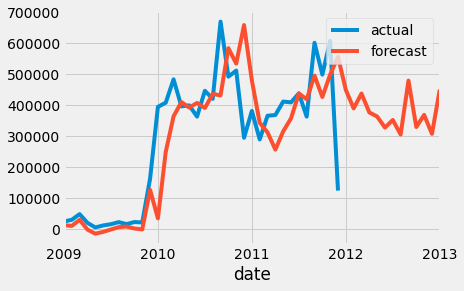

In [126]:
monthly_series.plot(label = 'actual')
forecast.plot(label = 'forecast')
plt.legend(loc = 'upper right')